In [1]:
from sklearn.datasets import load_iris, fetch_california_housing

In [2]:
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
iris.data.shape

(150, 4)

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
import pandas as pd

In [7]:
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [8]:
iris_data['species'] = iris.target_names[iris.target]
iris_data.head(3).append(iris_data.tail(3))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [9]:
import seaborn as sns
%matplotlib inline

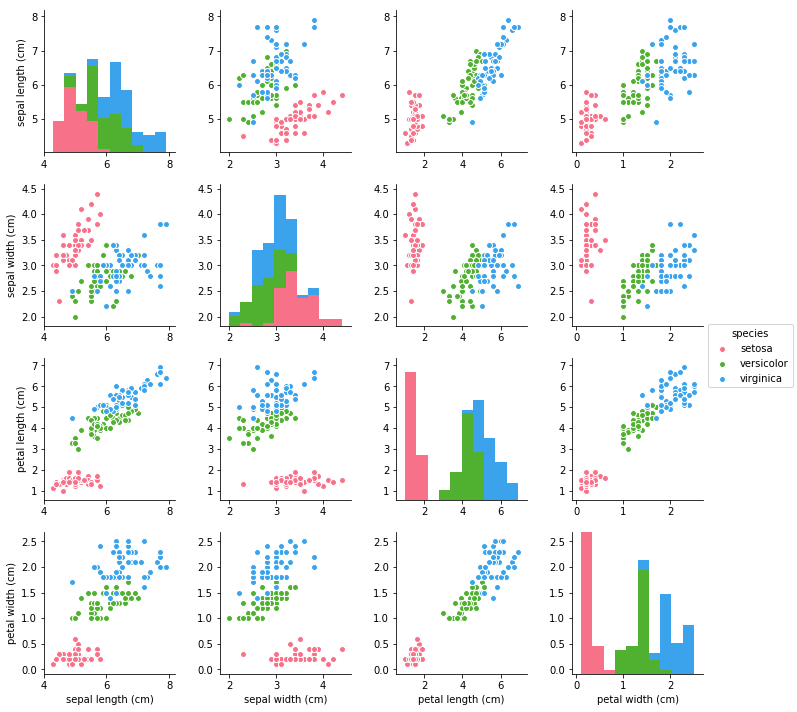

In [10]:
sns.pairplot(iris_data, hue='species', palette='husl')

In [11]:
california_housing = fetch_california_housing()
california_housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [12]:
california_housing.data.shape

(20640, 8)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression(normalize=True)

In [15]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

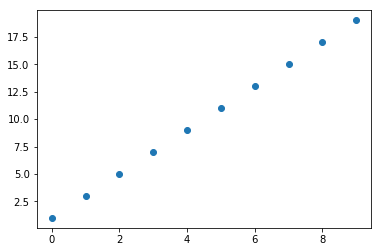

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(10)
y = 2 * x + 1
plt.plot(x, y, 'o')

In [17]:
X = x[:, np.newaxis]
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [18]:
model.coef_

array([2.])

In [19]:
model.intercept_

1.0

In [20]:
from sklearn.cluster import KMeans

In [21]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
X = iris.data[:, 0:2]
kmeans_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
kmeans_model.cluster_centers_

array([[5.77358491, 2.69245283],
       [5.006     , 3.418     ],
       [6.81276596, 3.07446809]])

In [24]:
kmeans_model.inertia_

37.12370212765957

In [25]:
import scikitplot as skplt

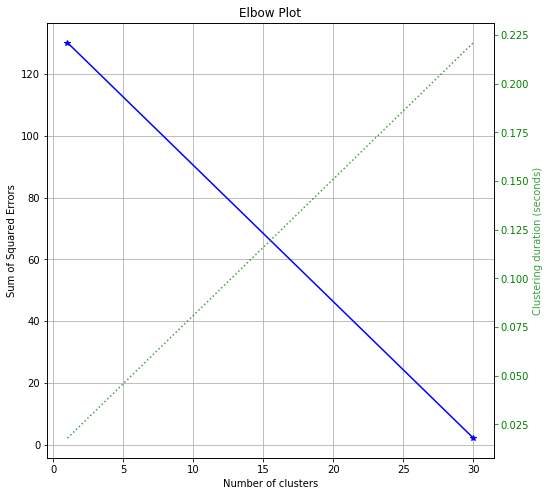

In [26]:
skplt.cluster.plot_elbow_curve(kmeans_model, X, cluster_ranges=(1, 30), figsize=(8, 8))
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2, random_state=1)
X_train.shape

(120, 4)

In [29]:
KM = KMeans(n_clusters=3, random_state=1)

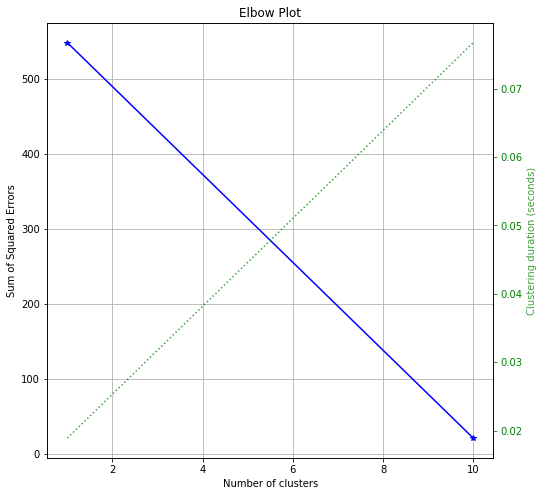

In [30]:
skplt.cluster.plot_elbow_curve(KM, X_train, cluster_ranges=(1, 10), figsize=(8, 8))
plt.show()

In [31]:
cluster_labels = KM.fit_predict(X_train)

In [32]:
print(cluster_labels)

[0 2 0 2 0 1 0 1 0 2 2 1 0 2 0 2 1 1 1 0 1 1 2 2 2 2 0 0 2 0 1 0 0 1 1 2 1
 0 2 0 0 2 0 1 0 0 2 0 2 0 1 1 1 2 1 0 2 0 1 1 0 1 2 0 2 2 0 2 2 0 1 0 1 0
 2 1 0 1 1 2 0 2 1 1 0 1 0 1 2 0 1 2 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1
 2 0 2 0 0 2 0 2 1]


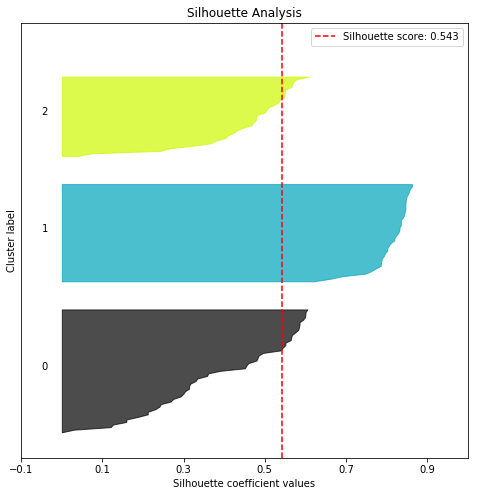

In [33]:
skplt.metrics.plot_silhouette(X_train, cluster_labels, figsize=(8, 8))
plt.show()

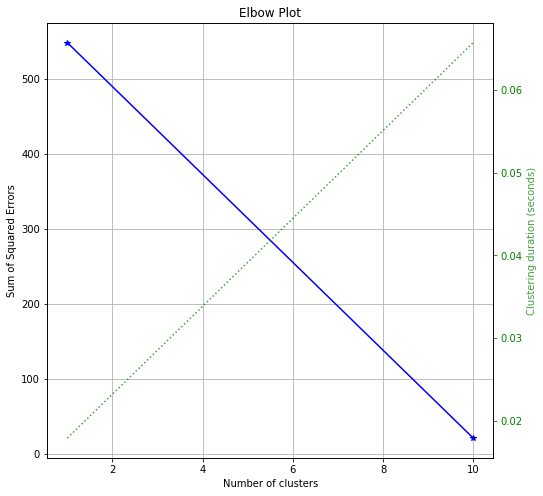

In [34]:
skplt.cluster.plot_elbow_curve(KM, X_train, cluster_ranges=(1, 10), figsize=(8, 8))
plt.show()

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
model = LogisticRegression(solver='lbfgs', multi_class='multinomial')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
y_pred = model.predict(X_test)
p_pred = model.predict_proba(X_test)

In [49]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [50]:
y_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

In [51]:
p_pred

array([[9.84838107e-01, 1.51618716e-02, 2.15226800e-08],
       [2.77750292e-01, 7.19607557e-01, 2.64215054e-03],
       [6.20472987e-03, 8.89278130e-01, 1.04517140e-01],
       [9.85603688e-01, 1.43962498e-02, 6.26477989e-08],
       [1.13488565e-06, 1.90734036e-02, 9.80925462e-01],
       [4.44442012e-03, 6.28359639e-01, 3.67195941e-01],
       [1.43055507e-04, 1.27858167e-01, 8.71998777e-01],
       [9.58064894e-01, 4.19338912e-02, 1.21506979e-06],
       [9.70124194e-01, 2.98755035e-02, 3.02876875e-07],
       [9.45647207e-06, 2.71062283e-02, 9.72884315e-01],
       [1.89252685e-02, 8.79798540e-01, 1.01276191e-01],
       [9.66646158e-01, 3.33534040e-02, 4.38309808e-07],
       [4.58638440e-06, 3.10292144e-02, 9.68966199e-01],
       [7.03644455e-03, 8.02107267e-01, 1.90856289e-01],
       [6.90494811e-03, 7.49330156e-01, 2.43764896e-01],
       [9.88354149e-01, 1.16457858e-02, 6.55785519e-08],
       [2.24985283e-02, 9.36973130e-01, 4.05283415e-02],
       [1.08466128e-02, 6.82262

In [52]:
print(model.score(X_test, y_test))

0.9666666666666667


In [53]:
enc = ['win', 'draw', 'lose', 'win']
dec = ['draw', 'draw', 'win']

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
LE = LabelEncoder()
print(LE.fit(enc))

LabelEncoder()


In [56]:
print(LE.classes_)

['draw' 'lose' 'win']


In [57]:
print(LE.transform(dec))

[0 0 2]


In [59]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
OHE = OneHotEncoder()

In [61]:
num = LE.fit_transform(enc)

In [62]:
num

array([2, 0, 1, 2], dtype=int64)

In [63]:
OHE_y = OHE.fit_transform(num.reshape(-1, 1))

In [64]:
OHE_y

<4x3 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [65]:
OHE_y.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [67]:
iris = load_iris()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2, random_state=1)

In [69]:
from sklearn import metrics

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
RF = RandomForestClassifier(n_estimators=5, max_depth=5)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [80]:
RF.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1444291197, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=373210811, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fract

In [81]:
metrics.accuracy_score(y_train, RF.predict(X_train))

0.9833333333333333

In [82]:
metrics.accuracy_score(y_test, RF.predict(X_test))

0.9666666666666667

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [84]:
LR = LogisticRegression(solver='lbfgs', multi_class='multinomial')
RF = RandomForestClassifier(n_estimators=5)
GNB = GaussianNB()


In [85]:
Ensemble = VotingClassifier(estimators=[('lr', LR), ('rf', RF), ('gnb', GNB)], voting='hard')

In [86]:
Ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', Ran...lse, random_state=None, verbose=0,
            warm_start=False)), ('gnb', GaussianNB(priors=None))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [89]:
Ensemble.estimators_

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='multinomial',
           n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
           tol=0.0001, verbose=0, warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 GaussianNB(priors=None)]

In [90]:

LR.fit( X_train, y_train )
RF.fit( X_train, y_train )
GNB.fit( X_train, y_train )

GaussianNB(priors=None)

In [91]:
metrics.accuracy_score(y_train, LR.predict(X_train))

0.9833333333333333

In [92]:
metrics.accuracy_score(y_train, RF.predict(X_train))

1.0

In [93]:
metrics.accuracy_score(y_train, GNB.predict(X_train))

0.95

In [94]:
metrics.accuracy_score(y_train, Ensemble.predict(X_train))

C:\Users\lilanqing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9833333333333333

In [95]:
from sklearn.datasets import load_digits

In [97]:
digits = load_digits()

In [98]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [99]:
X_train, X_test, y_train, y_test = train_test_split( digits['data'], digits['target'], test_size=0.2 )

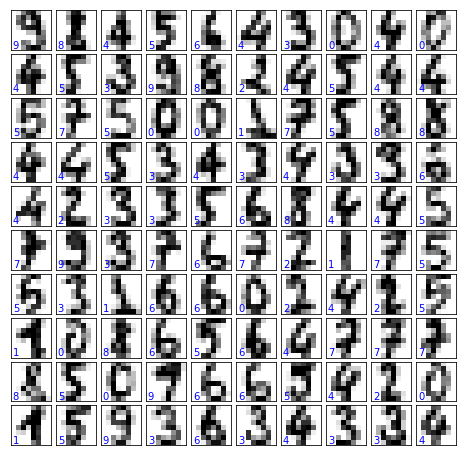

In [101]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i, :].reshape(8, 8), cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_train[i]), transform=ax.transAxes, color='blue')
    ax.set_xticks([])
    ax.set_yticks([])

In [102]:
from sklearn.multiclass import OneVsOneClassifier

In [103]:
ovo_lr = OneVsOneClassifier(LogisticRegression(solver='lbfgs', max_iter=200))
ovo_lr.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [104]:
print(len(ovo_lr.estimators_))

45


In [105]:
metrics.accuracy_score(y_train, ovo_lr.predict(X_train))

1.0

In [106]:
metrics.accuracy_score(y_test, ovo_lr.predict(X_test))

0.9944444444444445

In [107]:
from sklearn.multiclass import OneVsRestClassifier

In [108]:
ova_lr = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=200))
ova_lr.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [109]:
print(len(ova_lr.estimators_))

10


In [110]:
metrics.accuracy_score(y_train, ova_lr.predict(X_train))

0.9979123173277662

In [111]:
metrics.accuracy_score(y_test, ova_lr.predict(X_test))

0.9666666666666667